#### IMPORTING LIBRARIES

In [872]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
import sklearn
warnings.filterwarnings('ignore')

In [782]:
test = pd.read_csv('../data/test.csv')
train = pd.read_csv('../data/train.csv')

This warning implies corrupt data in some of the columns which do not match the dtype of the specified column.We will handle this first by cleaning the data.

#### CLEANING THE DATA

In [783]:
train.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [784]:
train.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

In [785]:
drop_columns=['ID',"Customer_ID","Name","SSN"]

The columns "ID," "Customer_ID," "Name," and "SSN" likely contain sensitive personal information. So we drop these columns to avoid building a model which involves sensitive personal information. 



In [786]:
#Dropping the columns
train=train.drop(drop_columns,axis=1)
test=test.drop(drop_columns,axis=1)

In [787]:
#segregating the columns into numerical and categorical
categorical_columns = [cols for cols in train.columns if train[cols].dtype == object and cols != 'Credit_Score' ]
numerical_columns = [cols for cols in train.columns if train[cols].dtype != object]

In [788]:
categorical_columns

['Month',
 'Age',
 'Occupation',
 'Annual_Income',
 'Num_of_Loan',
 'Type_of_Loan',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance']

In [789]:
numerical_columns

['Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month']

In [790]:
train[categorical_columns].head()

,Month,Age,Occupation,Annual_Income,Num_of_Loan,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,-500,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23,Scientist,19114.12,4,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


In [791]:
#Annual_Income and Num_of_Loan which should be numerical columns became object because of corrupt data, so we shall replace these particular values

train['Annual_Income']=train["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Annual_Income']=test["Annual_Income"].apply(lambda x:x.replace("_","") if '_' in x else x)
train["Num_of_Loan"]=train["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)
test["Num_of_Loan"]=test["Num_of_Loan"].apply(lambda x:x.replace("_","")if "_" in x else x)

In [792]:
train['Annual_Income']=train["Annual_Income"].astype(float)
test['Annual_Income']=test["Annual_Income"].astype(float)

In [793]:
categorical_columns.remove('Annual_Income')
numerical_columns.append('Annual_Income')

In [794]:
train["Num_of_Loan"]=train["Num_of_Loan"].astype(int)
test["Num_of_Loan"]=test["Num_of_Loan"].astype(int)

In [795]:
categorical_columns.remove('Num_of_Loan')
numerical_columns.append('Num_of_Loan')

In [796]:
train[categorical_columns].head()

,Month,Age,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
2,March,-500,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,_,Good,809.98,22 Years and 3 Months,No,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912
3,April,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,23,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177


In [797]:
#The next column we will try to modify is age as clearly age is a numerical column
train['Age'].unique()


array(['23', '-500', '28_', ..., '4808_', '2263', '1342'], dtype=object)

In [798]:
train['Age']=train["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)
test['Age']=test["Age"].apply(lambda x:x.replace("_","") if '_' in x else x)

In [799]:
train['Age'].unique()

array(['23', '-500', '28', ..., '4808', '2263', '1342'], dtype=object)

In [800]:
train["Age"]=train["Age"].astype(int)
test["Age"]=test["Age"].astype(int)

In [801]:
#Dropping the negative values
mask = train['Age'] < 0
train = train.loc[~mask]
mask = test['Age'] < 0
test = test.loc[~mask]


In [802]:
train['Age'].unique()

array([  23,   28,   34, ..., 4808, 2263, 1342])

In [803]:
train.shape

(99114, 24)

In [804]:
#dropping the values which have age > 120
mask = train['Age'] >120
train = train.loc[~mask]


In [805]:
train.shape

(97230, 24)

In [806]:
train['Age'].unique()

array([ 23,  28,  34,  54,  55,  21,  31,  33,  30,  24,  44,  45,  40,
        41,  32,  35,  36,  39,  37,  20,  46,  26,  42,  19,  48,  38,
        43,  22,  16,  18,  15,  27,  25,  14,  17,  47,  53,  56,  29,
        49,  51,  50,  52, 112, 118,  99, 100, 102, 111,  95, 109, 115])

The values now have a more suitable range and thus can be added to the numerical columns.

In [807]:
categorical_columns.remove('Age')
numerical_columns.append('Age')

In [808]:
train[categorical_columns].head()

,Month,Occupation,Type_of_Loan,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",7,11.27,_,809.98,22 Years and 1 Months,No,80.41529543900253,High_spent_Small_value_payments,312.49408867943663
1,February,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,NaN,No,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184
3,April,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,6.27,Good,809.98,22 Years and 4 Months,No,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786
4,May,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177
5,June,Scientist,"Auto Loan, Credit-Builder Loan, Personal Loan,...",4,9.27,Good,809.98,22 Years and 6 Months,No,62.430172331195294,!@9#%8,340.4792117872438


In [809]:
#TODO : Figure out whether to drop the test.csv file altogether
#Change values in the remaining categorical columns and fix the numerical columns
train.shape

(97230, 24)

1. Monthly Balance (done)
2. Amount_invested_monthly(done)
3. Outstanding_Debt(done)
4. Changed_Credit_Limit(drop?)
5. Payment_of_Min_Amount

Tasks:
1. Make a plot function for both catgeorical and numerical values
2. Figure out what to do with numerical values(scaling)


- Min-max scaling
- Binning


In [810]:
train.isna().sum()

Month                           0
Age                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       14597
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11076
Delay_from_due_date             0
Num_of_Delayed_Payment       6826
Changed_Credit_Limit            0
Num_Credit_Inquiries         1906
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           8794
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4344
Payment_Behaviour               0
Monthly_Balance              1179
Credit_Score                    0
dtype: int64

In [811]:
drop_columns = ['Monthly_Inhand_Salary','Type_of_Loan']
train = train.drop(drop_columns,axis=1) #dropping the columns as they have missing values for more than 10% of the dataset
categorical_columns.remove('Type_of_Loan')
numerical_columns.remove('Monthly_Inhand_Salary')
train.shape

(97230, 22)

### Cleaning and Plotting Functions

In [812]:
#For plotting histogram of integer data
def plot_distribution(data, bins=10, xlabel='', ylabel='', color='skyblue'):
    # Create a histogram of the data
    plt.hist(data, bins=bins, color=color, edgecolor='black', alpha=0.7)
    title = 'Distribution of ' + xlabel
    # Set the title and labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Show the plot
    plt.show()


In [813]:
#For plotting Distribution plot
def dist_plot(column = "",df = train):
    plt.figure(figsize=(6,4))
    sns.displot(df[column])
    plt.title(column, size=15)
    plt.show()

In [814]:
def filter_(value: str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

In [815]:
def replace(column,character = "_"):
    train[column]=train[column].apply(lambda x:x.replace(character,"") if character in x else x)

In [816]:
def category_distributions(x,data = train,title = '',size = 15,figx = 10,figy = 6):
    plt.figure(figsize=(figx,figy))
    sns.countplot(x=x,data = data)
    plt.title(title, size=size)
    plt.show()

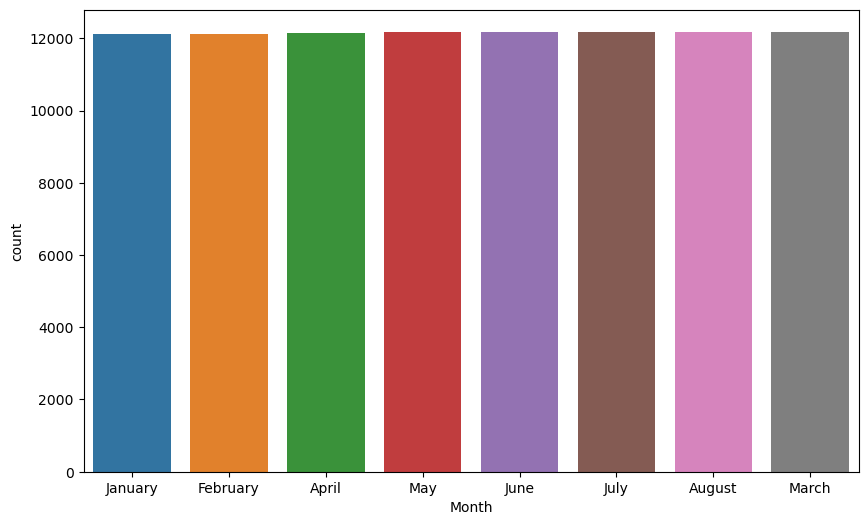

In [817]:
category_distributions(x = 'Month')

In [818]:
train['Month'].unique()

array(['January', 'February', 'April', 'May', 'June', 'July', 'August',
       'March'], dtype=object)

- We see that the distribution is even with no missing values and even distribution so we can go ahead without any changes

In [819]:
train['Monthly_Balance'].unique()

array(['312.49408867943663', '284.62916249607184', '223.45130972736786',
       ..., 516.8090832742814, 319.1649785257098, 393.6736955618808],
      dtype=object)

In [820]:
train["Monthly_Balance"].value_counts()

Monthly_Balance
__-333333333333333333333333333__    9
312.49408867943663                  1
307.89891340252535                  1
425.71252921072                     1
401.81301155241687                  1
                                   ..
309.4159683487181                   1
272.22357341904336                  1
257.2822542162112                   1
247.5347047656841                   1
393.6736955618808                   1
Name: count, Length: 96043, dtype: int64

- Need to fix this particular value

In [821]:

train['Monthly_Balance'].isna().sum()/train['Monthly_Balance'].size * 100


1.2125887071891392

- As the number of missing values is less than 3% we can fill the value with the median of the data

In [822]:
train['Monthly_Balance'] = train['Monthly_Balance'].replace('__-333333333333333333333333333__', np.nan)
train['Monthly_Balance'].median(skipna=True)

336.6603987296653

In [823]:
train['Monthly_Balance'].fillna(336.6603987296653, inplace=True)
train['Monthly_Balance'].isna().sum()

0

In [824]:
train['Monthly_Balance'] = train['Monthly_Balance'].astype(float)

<Figure size 600x400 with 0 Axes>

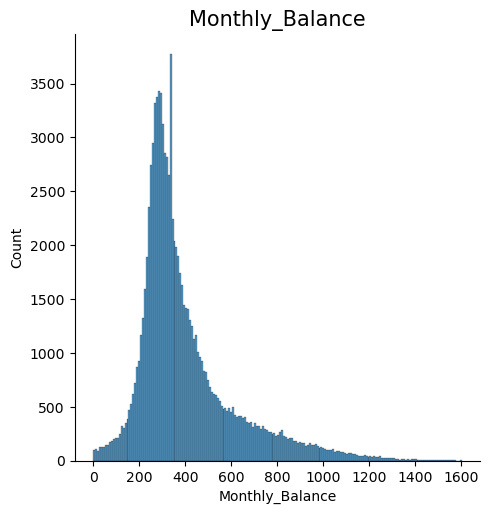

In [825]:
dist_plot(column='Monthly_Balance')

In [826]:
# log_balance = np.log(train['Amount_invested_monthly'])
# plt.figure(figsize=(6,4))
# sns.displot(log_balance)
# plt.title("amount_invested", size=15)
# plt.show()


In [827]:
# import scipy.stats as stats #to check the skewness of the data
# skewness = stats.skew(log_balance)
# skewness

In [828]:
# train['Monthly_Balance'] = log_balance

In [829]:
#Amount_invested_monthly
train['Amount_invested_monthly'].isna().sum()

4344

In [830]:
train["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__            4174
0.0                   163
80.41529543900253       1
318.1115571758724       1
36.66235139442514       1
                     ... 
33.6098814431885        1
76.87001005130772       1
908.6939096189257       1
458.552411389832        1
167.1638651610451       1
Name: count, Length: 88551, dtype: int64

In [831]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('__10000__', np.nan)
train['Amount_invested_monthly'].isna().sum()/train['Amount_invested_monthly'].size * 100


8.760670574925435

In [832]:
train['Amount_invested_monthly'].median(skipna=True)

129.04586772143045

In [833]:
train['Amount_invested_monthly'].fillna(129.04586772143045,inplace=True)
train["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
129.04586772143045    8518
0.0                    163
80.41529543900253        1
318.1115571758724        1
36.66235139442514        1
                      ... 
33.6098814431885         1
76.87001005130772        1
908.6939096189257        1
458.552411389832         1
167.1638651610451        1
Name: count, Length: 88551, dtype: int64

<Figure size 600x400 with 0 Axes>

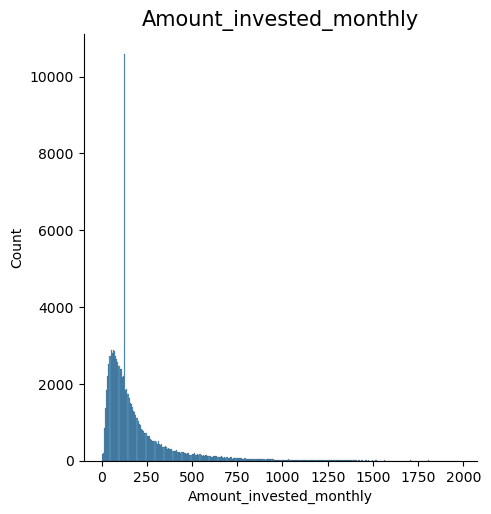

In [834]:
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(float)
dist_plot(column='Amount_invested_monthly')

- We notice that the data has a right skewed nature so we will be checking what happens to the data if we use log transform

In [835]:
# log_amount = np.log(train['Amount_invested_monthly'])
# plt.figure(figsize=(6,4))
# sns.displot(log_amount)
# plt.title("amount_invested", size=15)
# plt.show()

In [836]:
# Outstanding_Debt
# train['Outstanding_Debt'].isna().sum()
train['Outstanding_Debt'].value_counts()

Outstanding_Debt
1151.7      23
1360.45     22
1109.03     22
460.46      20
156.76      16
            ..
1265.83_     1
3025.44_     1
2010.01_     1
447.18_      1
221.86_      1
Name: count, Length: 13148, dtype: int64

In [837]:
replace(column = 'Outstanding_Debt')
train['Outstanding_Debt'].value_counts()

Outstanding_Debt
1151.7     24
1109.03    23
1360.45    22
460.46     21
1445.81    16
           ..
378.58      5
1374.56     5
421.54      5
1452.04     5
904.93      4
Name: count, Length: 12203, dtype: int64

<Figure size 600x400 with 0 Axes>

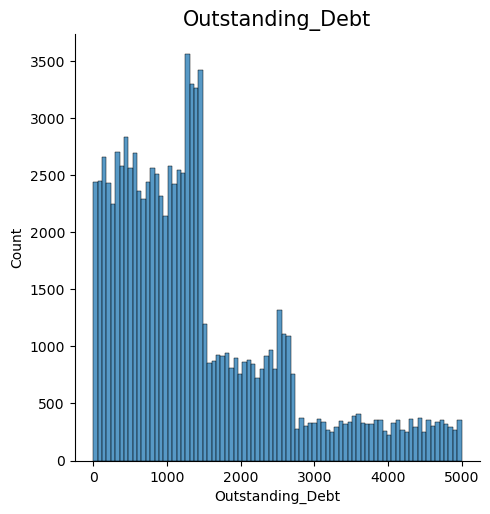

In [838]:
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(float)
dist_plot(column='Outstanding_Debt')

In [839]:
# Changed_Credit_Limit
train['Changed_Credit_Limit'].value_counts()


Changed_Credit_Limit
_                      2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [840]:
replace(column='Changed_Credit_Limit')
train['Changed_Credit_Limit'].value_counts()

Changed_Credit_Limit
                       2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [841]:
# train['Changed_Credit_Limit']=train['Changed_Credit_Limit'].apply(lambda x:x.replace("","NaN") if "" in x else x)
# train['Changed_Credit_Limit'].mean(skipna=True)

# train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)
# dist_plot(column='Changed_Credit_Limit')

In [842]:
# Payment_of_Min_Amount
train['Payment_of_Min_Amount'].isna().sum()
train['Payment_of_Min_Amount'].value_counts()


Payment_of_Min_Amount
Yes    50914
No     34649
NM     11667
Name: count, dtype: int64

In [843]:
train['Payment_of_Min_Amount']=train['Payment_of_Min_Amount'].apply(lambda x:x.replace("NM","No") if "NM" in x else x)
train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    50914
No     46316
Name: count, dtype: int64

In [844]:
train[categorical_columns]

,Month,Occupation,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,Scientist,7,11.27,_,809.98,22 Years and 1 Months,No,80.415295,High_spent_Small_value_payments,312.494089
1,February,Scientist,NaN,11.27,Good,809.98,NaN,No,118.280222,Low_spent_Large_value_payments,284.629162
3,April,Scientist,4,6.27,Good,809.98,22 Years and 4 Months,No,199.458074,Low_spent_Small_value_payments,223.451310
4,May,Scientist,NaN,11.27,Good,809.98,22 Years and 5 Months,No,41.420153,High_spent_Medium_value_payments,341.489231
5,June,Scientist,4,9.27,Good,809.98,22 Years and 6 Months,No,62.430172,!@9#%8,340.479212
...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Mechanic,7,11.5,_,502.38,31 Years and 6 Months,No,60.971333,High_spent_Large_value_payments,479.866228
99996,May,Mechanic,7,11.5,_,502.38,31 Years and 7 Months,No,54.185950,High_spent_Medium_value_payments,496.651610
99997,June,Mechanic,6,11.5,Good,502.38,31 Years and 8 Months,No,24.028477,High_spent_Large_value_payments,516.809083
99998,July,Mechanic,NaN,11.5,Good,502.38,31 Years and 9 Months,No,251.672582,Low_spent_Large_value_payments,319.164979


In [845]:
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    35519
Good        23617
_           19633
Bad         18461
Name: count, dtype: int64

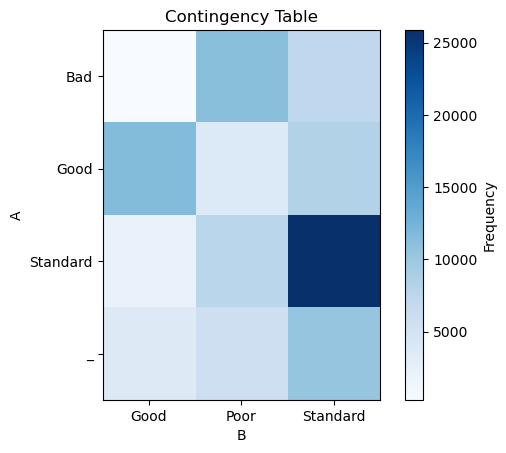

In [846]:
contingency_table = pd.crosstab(train['Credit_Mix'], train['Credit_Score'])
plt.imshow(contingency_table, cmap='Blues', interpolation='nearest')
plt.colorbar(label='Frequency')
plt.xlabel('B')
plt.ylabel('A')
plt.title('Contingency Table')
plt.xticks(range(len(contingency_table.columns)), contingency_table.columns)
plt.yticks(range(len(contingency_table.index)), contingency_table.index)
plt.show()

- We see how the dark squares represent the correlation between the target variable and the 'Credit_Mix' atribute hence we can observe how filling the blank values with Standard would be the ideal choice

In [847]:
train['Credit_Mix']=train['Credit_Mix'].apply(lambda x:x.replace("_","Standard") if "_" in x else x)
train['Credit_Mix'].value_counts()

Credit_Mix
Standard    55152
Good        23617
Bad         18461
Name: count, dtype: int64

In [848]:
print(train['Occupation'].isna().sum())
train['Occupation'].value_counts()

0


Occupation
_______          6873
Lawyer           6390
Architect        6175
Engineer         6172
Scientist        6113
Accountant       6111
Mechanic         6099
Media_Manager    6068
Teacher          6049
Developer        6032
Entrepreneur     6016
Doctor           5916
Journalist       5906
Manager          5807
Musician         5761
Writer           5742
Name: count, dtype: int64

In [849]:
print(train['Num_of_Delayed_Payment'].isna().sum(),train['Num_of_Delayed_Payment'].dtype)
train['Num_of_Delayed_Payment'].value_counts()

6826 object


Num_of_Delayed_Payment
19      5166
17      5136
16      5015
10      5000
18      4935
        ... 
1164       1
2616       1
848_       1
4134       1
2047       1
Name: count, Length: 730, dtype: int64

In [850]:
train["Num_of_Delayed_Payment"] = train["Num_of_Delayed_Payment"].apply(filter_)
train['Num_of_Delayed_Payment'].value_counts()

Num_of_Delayed_Payment
19      5315
17      5284
10      5154
16      5148
15      5084
        ... 
2616       1
848        1
4134       1
1530       1
2047       1
Name: count, Length: 692, dtype: int64

In [851]:
train['Num_of_Delayed_Payment'].median(skipna=True)


14.0

In [852]:
train['Num_of_Delayed_Payment'].fillna(14.0, inplace=True)
train['Num_of_Delayed_Payment']

0           7
1        14.0
3           4
4        14.0
5           4
         ... 
99995       7
99996       7
99997       6
99998    14.0
99999       6
Name: Num_of_Delayed_Payment, Length: 97230, dtype: object

In [853]:
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].astype(float)

In [854]:
train['Payment_Behaviour'].isna().sum()

0

In [855]:
train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      24839
High_spent_Medium_value_payments    17041
Low_spent_Medium_value_payments     13477
High_spent_Large_value_payments     13332
High_spent_Small_value_payments     11034
Low_spent_Large_value_payments      10130
!@9#%8                               7377
Name: count, dtype: int64

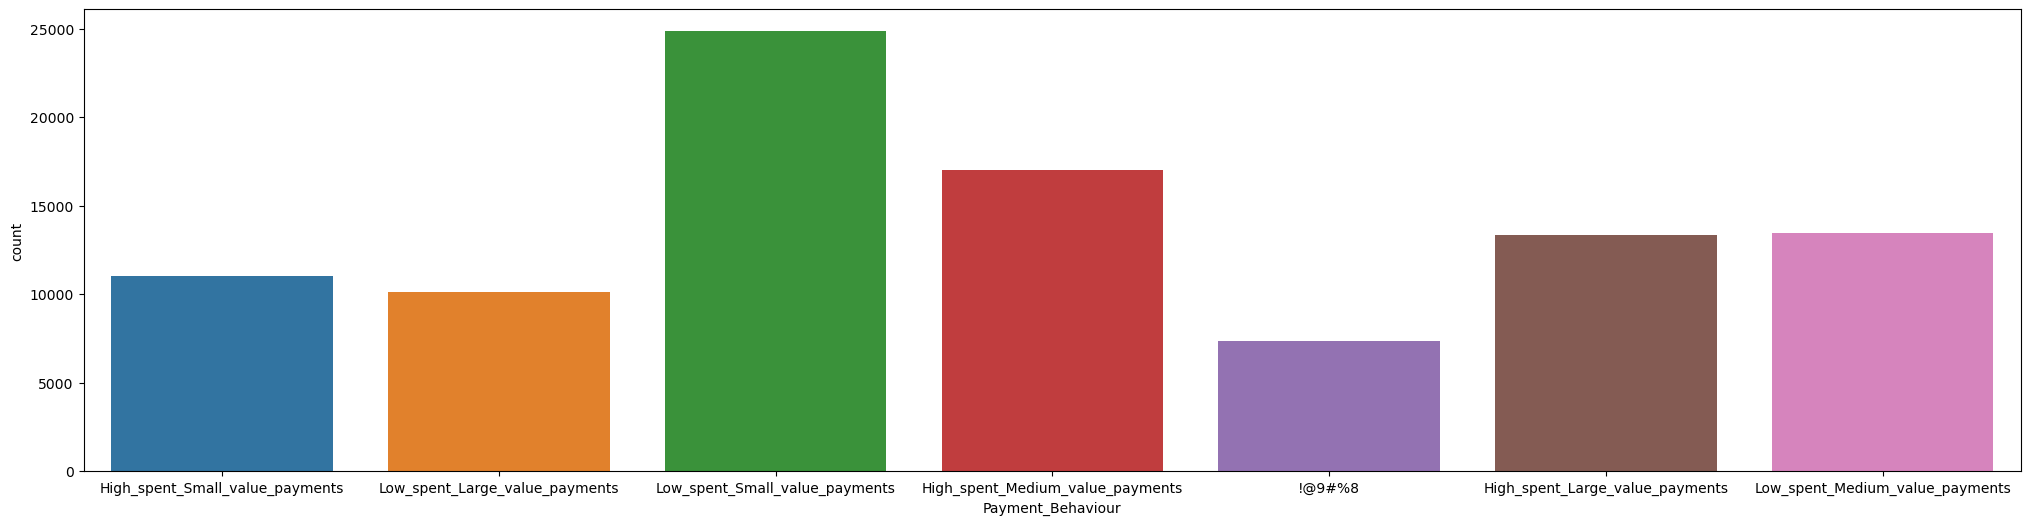

In [856]:
category_distributions(x='Payment_Behaviour',figx=25)

> we will just leave the garbage values as it is as imputing these rows with any of the other types will affect the distribution of the other data columns.

In [857]:
#Credit_History_Age
print(train['Credit_History_Age'].isna().sum())
train['Credit_History_Age'].value_counts()

8794


Credit_History_Age
15 Years and 11 Months    435
15 Years and 9 Months     428
17 Years and 11 Months    428
19 Years and 3 Months     427
19 Years and 5 Months     425
                         ... 
0 Years and 3 Months       19
0 Years and 2 Months       14
33 Years and 7 Months      14
33 Years and 8 Months      12
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

In [858]:
# test_train['Credit_History_Age'] = train['Credit_History_Age'].dropna()
def YearstoNum(year : str):
    

    if str(year) == 'NaN':
        return year
    year = str(year)
    Year =[]
    month =[]
    flag = 0

    for i in year:
        if i == 'd':
            flag = 1
        if i.isnumeric() and flag == 0:
            Year.append(i)
        if i.isnumeric() and flag == 1:
            month.append(i)
    
    # print(Year,month)
    years = 0
    months = 0
    for i in Year:
        years += int(i)
        years = years*10
    years = years/10

    for i in month:
        months += int(i)
        months = months*10
    months = months/120
    
    years += months
    years = round(years,4)

    return str(years)

In [859]:
train["Credit_History_Age"] = train["Credit_History_Age"].apply(YearstoNum)
print(train['Credit_History_Age'].isna().sum())
train['Credit_History_Age'].value_counts()
train['Credit_History_Age'] = train['Credit_History_Age'].astype(float)

0


<Figure size 600x400 with 0 Axes>

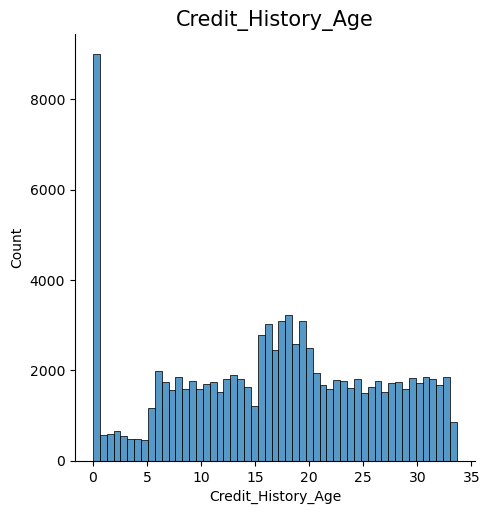

In [860]:
dist_plot(column='Credit_History_Age')

In [861]:
train[categorical_columns]

,Month,Occupation,Num_of_Delayed_Payment,Changed_Credit_Limit,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,January,Scientist,7.0,11.27,Standard,809.98,22.0833,No,80.415295,High_spent_Small_value_payments,312.494089
1,February,Scientist,14.0,11.27,Good,809.98,0.0000,No,118.280222,Low_spent_Large_value_payments,284.629162
3,April,Scientist,4.0,6.27,Good,809.98,22.3333,No,199.458074,Low_spent_Small_value_payments,223.451310
4,May,Scientist,14.0,11.27,Good,809.98,22.4167,No,41.420153,High_spent_Medium_value_payments,341.489231
5,June,Scientist,4.0,9.27,Good,809.98,22.5000,No,62.430172,!@9#%8,340.479212
...,...,...,...,...,...,...,...,...,...,...,...
99995,April,Mechanic,7.0,11.5,Standard,502.38,31.5000,No,60.971333,High_spent_Large_value_payments,479.866228
99996,May,Mechanic,7.0,11.5,Standard,502.38,31.5833,No,54.185950,High_spent_Medium_value_payments,496.651610
99997,June,Mechanic,6.0,11.5,Good,502.38,31.6667,No,24.028477,High_spent_Large_value_payments,516.809083
99998,July,Mechanic,14.0,11.5,Good,502.38,31.7500,No,251.672582,Low_spent_Large_value_payments,319.164979


In [862]:
transfer_cols = []
for i in categorical_columns:
    if train[i].dtype == float:
        transfer_cols.append(i)

train[transfer_cols]

,Num_of_Delayed_Payment,Outstanding_Debt,Credit_History_Age,Amount_invested_monthly,Monthly_Balance
0,7.0,809.98,22.0833,80.415295,312.494089
1,14.0,809.98,0.0000,118.280222,284.629162
3,4.0,809.98,22.3333,199.458074,223.451310
4,14.0,809.98,22.4167,41.420153,341.489231
5,4.0,809.98,22.5000,62.430172,340.479212
...,...,...,...,...,...
99995,7.0,502.38,31.5000,60.971333,479.866228
99996,7.0,502.38,31.5833,54.185950,496.651610
99997,6.0,502.38,31.6667,24.028477,516.809083
99998,14.0,502.38,31.7500,251.672582,319.164979


In [863]:
for i in transfer_cols:
    categorical_columns.remove(i)
train[categorical_columns]

,Month,Occupation,Changed_Credit_Limit,Credit_Mix,Payment_of_Min_Amount,Payment_Behaviour
0,January,Scientist,11.27,Standard,No,High_spent_Small_value_payments
1,February,Scientist,11.27,Good,No,Low_spent_Large_value_payments
3,April,Scientist,6.27,Good,No,Low_spent_Small_value_payments
4,May,Scientist,11.27,Good,No,High_spent_Medium_value_payments
5,June,Scientist,9.27,Good,No,!@9#%8
...,...,...,...,...,...,...
99995,April,Mechanic,11.5,Standard,No,High_spent_Large_value_payments
99996,May,Mechanic,11.5,Standard,No,High_spent_Medium_value_payments
99997,June,Mechanic,11.5,Good,No,High_spent_Large_value_payments
99998,July,Mechanic,11.5,Good,No,Low_spent_Large_value_payments


In [864]:
train['Changed_Credit_Limit'].value_counts()
# train['Changed_Credit_Limit'].mean(skipna=True)
# train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)

Changed_Credit_Limit
                       2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [865]:
def clean_Credit_limit(value):
    value = str(value)
    if value == '':
        return 'NaN'
    flag = 0
    index = 0
    values = []
    for i in value:
        if i == '.':
            if flag == 1:
                break

            flag = 1
        values.append(i)
    ans = "".join([str(item) for item in values])
    return str(ans)


    
    
train["Changed_Credit_Limit"] = train["Changed_Credit_Limit"].apply(clean_Credit_limit)
  

In [866]:
train['Changed_Credit_Limit'].value_counts()


Changed_Credit_Limit
NaN                    2037
8.22                    133
11.5                    125
11.32                   122
7.35                    119
                       ... 
-0.2                      1
30.45                     1
-1.2200000000000002       1
35.83                     1
21.17                     1
Name: count, Length: 4375, dtype: int64

In [868]:
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].astype(float)
train['Changed_Credit_Limit'].mean(skipna=True),train['Changed_Credit_Limit'].median(skipna=True)

(10.389478743184895, 9.41)

<Figure size 600x400 with 0 Axes>

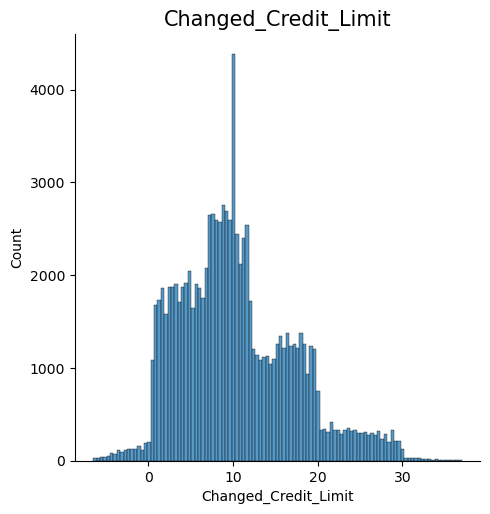

In [869]:
train['Changed_Credit_Limit'].fillna(value=10.02,inplace=True)
dist_plot(column='Changed_Credit_Limit')

In [870]:
categorical_columns.remove('Changed_Credit_Limit')
numerical_columns.append('Changed_Credit_Limit')

In [871]:
categorical_columns

['Month',
 'Occupation',
 'Credit_Mix',
 'Payment_of_Min_Amount',
 'Payment_Behaviour']

In [873]:
numerical_columns

['Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Delay_from_due_date',
 'Num_Credit_Inquiries',
 'Credit_Utilization_Ratio',
 'Total_EMI_per_month',
 'Annual_Income',
 'Num_of_Loan',
 'Age',
 'Changed_Credit_Limit']